Импортируем нужные библиотеки

In [374]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt



# **Предварительная обработка**

In [375]:
data = pd.read_csv("DATA (1).csv")
data

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


"для данного датасета нужно ввести метрику: студент успешный/неуспешный на основании грейда"

Введем столбец Success, в котором будем определять успешность студента - если у студента грейд больше или равен 4, он успешен.

In [376]:
data['Success'] = data['GRADE'].apply(lambda x: 1 if x >= 4 else 0)
data

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE,Success
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,2,1,2,1,3,3,9,5,1
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,3,2,2,1,5,3,9,5,1
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,3,3,2,1,4,3,9,1,0
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,2,1,2,1,5,3,9,4,1


In [377]:
#Проверка отсутствующих значений
data.isna().sum()

STUDENT ID                                                           0
Student Age                                                          0
Sex                                                                  0
Graduated high-school type                                           0
Scholarship type                                                     0
Additional work                                                      0
Regular artistic or sports activity                                  0
Do you have a partner                                                0
Total salary if available                                            0
Transportation to the university                                     0
Accomodation type in Cyprus                                          0
Mother's education                                                   0
Father's education                                                   0
Number of sisters/brothers                                           0
Parent

array([[<Axes: title={'center': 'Student Age'}>,
        <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Graduated high-school type'}>,
        <Axes: title={'center': 'Scholarship type'}>,
        <Axes: title={'center': 'Additional work'}>,
        <Axes: title={'center': 'Regular artistic or sports activity'}>],
       [<Axes: title={'center': 'Do you have a partner'}>,
        <Axes: title={'center': 'Total salary if available'}>,
        <Axes: title={'center': 'Transportation to the university'}>,
        <Axes: title={'center': 'Accomodation type in Cyprus'}>,
        <Axes: title={'center': "Mother's education"}>,
        <Axes: title={'center': "Father's education"}>],
       [<Axes: title={'center': 'Number of sisters/brothers'}>,
        <Axes: title={'center': 'Parental status'}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Weekly study hours'}>,
        

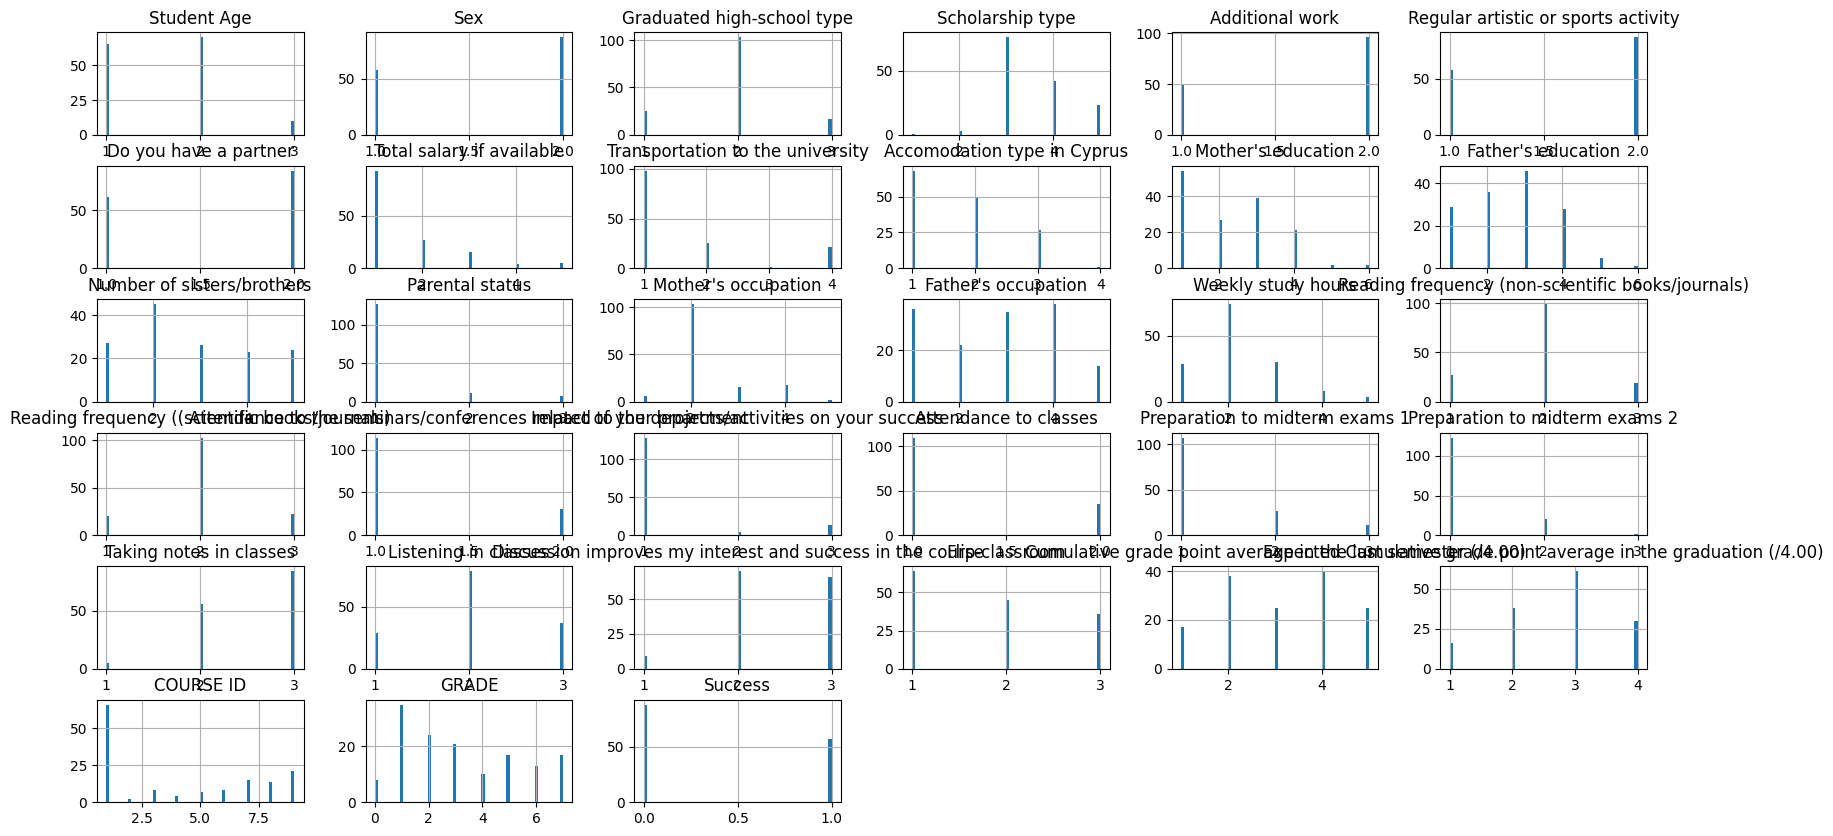

In [378]:
#Посмотрим на данные
data.hist(bins=60, figsize=(20, 10))

In [379]:
data.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
Student Age,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
Sex,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
Graduated high-school type,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
Scholarship type,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
Additional work,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
Regular artistic or sports activity,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
Do you have a partner,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
Total salary if available,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
Transportation to the university,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
Accomodation type in Cyprus,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


Видно, что:
* Все признаки категориальные
* Нет отсутствующих значений

In [380]:
#Удалим колонку с уникальными значениями
data = data.drop('STUDENT ID', axis=1)


# **Отобрать случайным образом sqrt(n) признаков**

In [381]:
# Определим количество признаков
num_features = data.shape[1]

# Определим количество признаков, которые нужно отобрать (sqrt(n))
num_selected_features = int(math.sqrt(num_features))

# Получим список всех признаков
all_features = list(data.columns)
# Выберем случайные признаки
selected_features = random.sample(all_features, num_selected_features)

data_temp = data[selected_features]
X = data_temp.values
Y = data.iloc[:, -2].values.reshape(-1,1)


# **Реализовать без использования сторонних библиотек построение дерева решений**

In [382]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):

        #узел принятия решений
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain #info_gain для данного узла

        #листовой узел
        self.value = value


In [383]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        # инициализация корня дерева
        self.root = None

        # условия остановки
        self.min_samples_split = min_samples_split #Если в узле меньше значений, чем данная переменная, мы его не делим
        self.max_depth = max_depth #максимальная глубина деления

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # разделяем до тех пор, пока не будут выполнены условия остановки
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"]>0: #Если равно 0, то наш узел уже состоит из элементов одного класса
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # возвращаем узел принятия решений
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])
            else:
              print("Not decision node")
        # считаем значения листа
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")
        #Проходимся по всем признакам
        for feature_index in range(num_features):
            #Получаем значения признака по текущему индексу
            feature_values = dataset[:, feature_index]
            #Берем уникальные значения - будут являться потенциальными порогами разбиения
            possible_thresholds = np.unique(feature_values)

            for threshold in possible_thresholds:
                #Делим данные по трешхолду
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                #Проверяем, что есть дочерние элементы
                if len(dataset_left)>0 and len(dataset_right)>0:
                    # Получаем значения целевой переменной для всего набора данных, левого и правого поддатасетов
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        return best_split

    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        #Считает значение, которое чаще всего встречается в этом узле
        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root
        if tree.value is not None:
            print(tree.value)
        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

    #Сбор меток классов
    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value #Если узел листовой
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

# **Train-test split**

In [384]:
# Разделение на обучающий и тестовый наборы
def train_test_split_custom(X, y, test_size=0.2):
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)

    # Генерация случайных индексов для тестового набора
    test_indices = np.random.choice(num_samples, num_test_samples, replace=False)

    # Индексы для обучающего набора
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, Y_train, Y_test = train_test_split_custom(X, Y, test_size=0.2)

In [385]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=4)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_3 <= 2 ? 0.015094967299926765
 left:X_2 <= 2 ? 0.03181544726734231
  left:X_0 <= 4 ? 0.032098765432098664
    left:X_0 <= 3 ? 0.034511784511784604
        left:X_0 <= 2 ? 0.03216985035166853
                left:2
                right:2
        right:X_2 <= 1 ? 0.1111111111111111
                left:1
                right:0
    right:X_2 <= 1 ? 0.12037037037037046
        left:2
        right:X_3 <= 1 ? 0.1026785714285714
                left:3
                right:5
  right:X_0 <= 2 ? 0.375
    left:6
    right:7
 right:X_1 <= 1 ? 0.01573017731286408
  left:X_0 <= 2 ? 0.021425718318110465
    left:X_2 <= 1 ? 0.026693030153237762
        left:X_0 <= 1 ? 0.3333333333333334
                left:3
                right:5
        right:X_0 <= 1 ? 0.03656462585034026
                left:7
                right:1
    right:X_0 <= 4 ? 0.030606060606060637
        left:X_4 <= 2 ? 0.038567493112947604
                left:1
                right:1
        right:X_2 <= 1 ? 0.1458333333333

In [386]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.2413793103448276

In [387]:
def classification_report(y_true, y_pred):
    total_samples = len(y_true)
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))

    for label in unique_labels:
        true_positive = np.sum(np.logical_and(y_true == label, y_pred == label))
        false_positive = np.sum(np.logical_and(y_true != label, y_pred == label))
        false_negative = np.sum(np.logical_and(y_true == label, y_pred != label))

        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

        accuracy = np.sum(y_true == y_pred) / total_samples

        print("Класс: {}".format(label))
        print("Точность (Precision): {:.2f}".format(precision))
        print("Полнота (Recall): {:.2f}".format(recall))
        print("Accuracy: {:.2f}\n".format(accuracy))

print(Y_test.tolist())
print(Y_pred)
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0])
y_pred = np.array([1, 0, 1, 0, 1, 1, 0, 1])
#classification_report(y_true, y_pred)

[[1], [7], [1], [7], [5], [7], [3], [3], [1], [5], [6], [1], [5], [1], [5], [1], [1], [4], [3], [7], [1], [2], [3], [1], [3], [3], [7], [3], [7]]
[1, 2, 1, 7, 5, 2, 1, 1, 2, 3, 5, 3, 6, 4, 2, 1, 3, 7, 2, 1, 1, 1, 2, 3, 2, 1, 2, 1, 7]


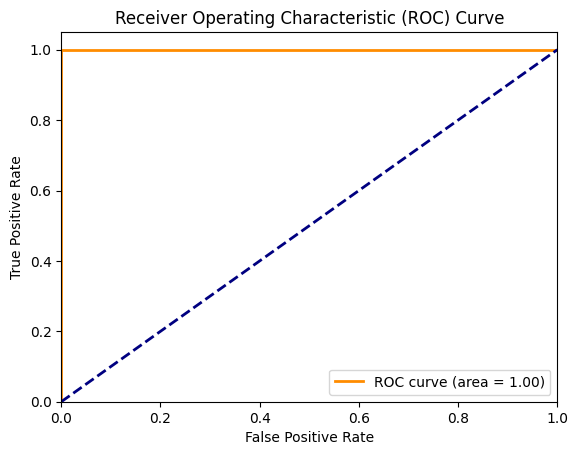

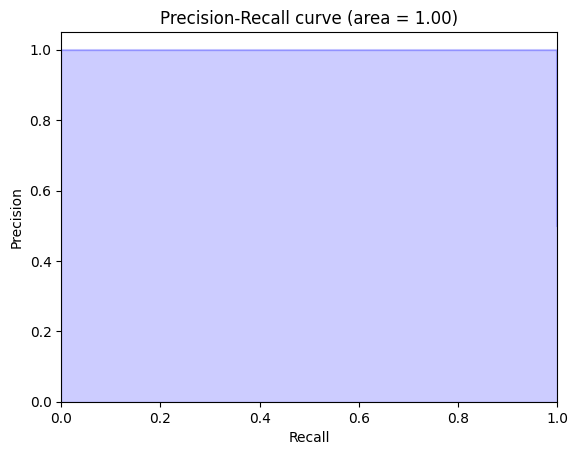

In [388]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Пример данных (замените их своими данными)
y_true = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0])
y_scores = np.array([0.1, 0.8, 0.6, 0.2, 0.9, 0.7, 0.3, 0.4, 0.85, 0.2])

# ROC кривая
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# AUC-PR кривая
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.show()